<a href="https://colab.research.google.com/github/na0260/machine-learning-lab/blob/main/knn_lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.feature_names)
print(iris.target)
print(iris.target_names)
print(iris.data.shape)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
(150, 4)


In [8]:
x = iris.data[:,:4]
y = iris.target
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
range_k = range(1,15)
score = {}
score_list = []
for k in range_k:
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(x_train, y_train)
  y_pred = classifier.predict(x_test)
  score[k] = metrics.accuracy_score(y_test, y_pred)
  score_list.append(metrics.accuracy_score(y_test, y_pred))
result = metrics.confusion_matrix(y_test, y_pred)
print("confusion_matrix:")
print(result)
result1 = metrics.classification_report(y_test, y_pred)
print("classification_report:")
print(result1)

confusion_matrix:
[[17  0  0]
 [ 0 14  0]
 [ 0  3 11]]
classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.82      1.00      0.90        14
           2       1.00      0.79      0.88        14

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.95      0.93      0.93        45



Text(0, 0.5, 'Accuracy')

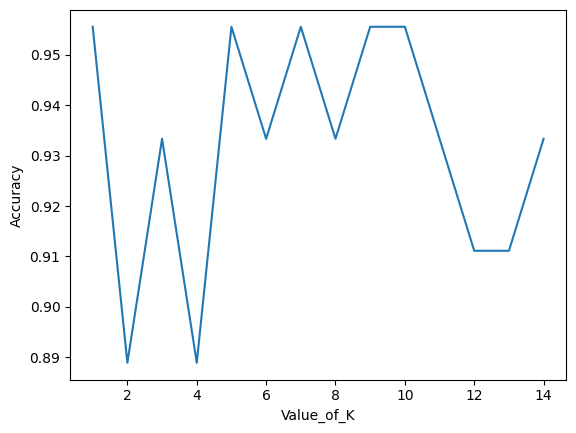

In [42]:
import matplotlib.pyplot as plt
plt.plot(range_k, score_list)
plt.xlabel("Value_of_K")
plt.ylabel("Accuracy")

In [43]:
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [44]:
classes = {0:'setosa',1:'versicolor',2:'verginicia'}
x_new =[[1,1,1,1],[2,4,4,0.2]]
y_predict = classifier.predict(x_new)
print(classes[y_predict[0]])
print(classes[y_predict[1]])

verginicia
verginicia
